# Regressão Linear - Multiplas Variáveis

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Gerar Dataset

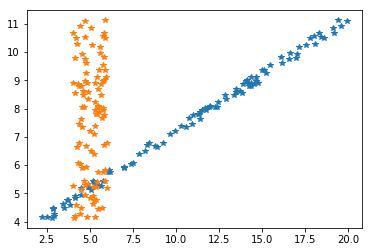

In [24]:
np.random.seed(101)

a = np.random.uniform(2, 20, 100)
b = np.random.uniform(4, 6, 100)

label = []
label = (0.4*a + 0.2*b + 2.2)

plt.plot(a, label, '*')
plt.plot(b, label, '*')

In [25]:
a_df = pd.DataFrame(data=a, columns=['A'])
b_df = pd.DataFrame(data=b, columns=['B'])
label_df = pd.DataFrame(data=label, columns=['LABEL'])

data = pd.concat([a_df, b_df, label_df], axis=1)
data.head()

,A,B,LABEL
0,11.295175,5.389129,7.795896
1,12.272017,4.684914,8.045789
2,2.512536,4.824781,4.169971
3,5.087390,4.479582,5.130872
4,14.334986,5.937672,9.121529


## Gerar Grafo - TensorFlow

In [26]:
m1 = tf.Variable(0.44)
m2 = tf.Variable(0.44)

bias = tf.Variable(0.87)

error = 0

In [27]:
for x1, x2, y in zip(a, b, label):
    y_hat = m1*x1 + m2*x2 + bias
    
    error += (y-y_hat)**2

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 20
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope1, final_slope2, final_intercept = sess.run([m1, m2, bias])

In [33]:
print(final_slope1, final_slope2, final_intercept)

4.62274e+28 1.81919e+28 3.58268e+27
